In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Part 1: Linear regression in Python

For this first part, we will be using a very small and easy dataset for illustrative purposes.

In [3]:
import statsmodels.api as sm #to import r dataset
df=sm.datasets.get_rdataset("women").data

In [4]:
df

,height,weight
0,58,115
1,59,117
2,60,120
3,61,123
4,62,126
5,63,129
6,64,132
7,65,135
8,66,139
9,67,142


The dataset contains weights and heights. As the following plot shows, these naturally follow a nice relationship:

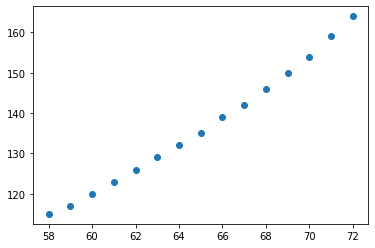

In [5]:
plt.scatter(df[["height"]],df[["weight"]])
plt.show()

### Linear regression with scikit

We can measure this relationship with linear regression. So far, we have looked at `statsmodels`. We now also explore `sklearn` (scikit-learn), which has more of a machine learning-orientation (it allows us to easily make and measure predictions). The key benefit of `sklearn` is that other machine learning tools can be run with pretty much the same commands - so once you understand one algorithm, it is easy to switch to more complex ones.

Note: there is no easy way to obtain other model outputs (p-values, etc.) from sklearn, as these outputs are not present in other, non-regression, machine learning models

In [6]:
X=df[["height"]]
Y=df[["weight"]]

lm = LinearRegression()
lm.fit(X, Y) # Fit a linear regression with vector Y as dependent and matrix X as independent

print("Intercept = ",lm.intercept_) # Print the resultant model intercept 

print("Model coefficients = ", lm.coef_) # Print the resultant model coefficients (in order of variables in X)

print("R^2 =",lm.score(X,Y)) # Print the resultant model R-squared

Intercept =  [-87.51666667]
Model coefficients =  [[3.45]]
R^2 = 0.9910098326857505


We plot the result using scikit's predict function:

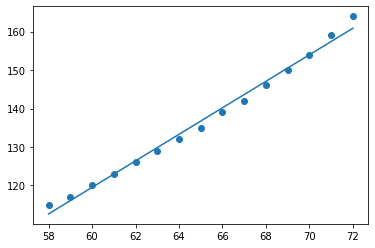

In [7]:
Y_pred=lm.predict(X)
plt.scatter(X,Y)
plt.plot(X,Y_pred)
plt.show()

# Part 2: Polynomial regression in Python

We present both scikit-learn and statsmodels methods here.


### 1. Polynomial regression with scikit-learn

The polynomial regression is, in fact, a linear regression on a transformed set of X-variables. We have to define the degree of the polynomial, however:

In [8]:
from sklearn.preprocessing import PolynomialFeatures

degree=3
X=df[["height"]]
Y=df[["weight"]]

poly = PolynomialFeatures(degree) #define a polynomial
X_poly=poly.fit_transform(X) #map all the values of X as [1,x,x^2,x^3, etc]
X_poly

array([[1.00000e+00, 5.80000e+01, 3.36400e+03, 1.95112e+05],
       [1.00000e+00, 5.90000e+01, 3.48100e+03, 2.05379e+05],
       [1.00000e+00, 6.00000e+01, 3.60000e+03, 2.16000e+05],
       [1.00000e+00, 6.10000e+01, 3.72100e+03, 2.26981e+05],
       [1.00000e+00, 6.20000e+01, 3.84400e+03, 2.38328e+05],
       [1.00000e+00, 6.30000e+01, 3.96900e+03, 2.50047e+05],
       [1.00000e+00, 6.40000e+01, 4.09600e+03, 2.62144e+05],
       [1.00000e+00, 6.50000e+01, 4.22500e+03, 2.74625e+05],
       [1.00000e+00, 6.60000e+01, 4.35600e+03, 2.87496e+05],
       [1.00000e+00, 6.70000e+01, 4.48900e+03, 3.00763e+05],
       [1.00000e+00, 6.80000e+01, 4.62400e+03, 3.14432e+05],
       [1.00000e+00, 6.90000e+01, 4.76100e+03, 3.28509e+05],
       [1.00000e+00, 7.00000e+01, 4.90000e+03, 3.43000e+05],
       [1.00000e+00, 7.10000e+01, 5.04100e+03, 3.57911e+05],
       [1.00000e+00, 7.20000e+01, 5.18400e+03, 3.73248e+05]])

In [9]:
polyreg = LinearRegression().fit(X_poly, Y) # try and find coefficients c1+c2*x+x3*x^2+... via linear regression

print(polyreg.coef_) #print these coefficients
print(polyreg.score(X_poly,Y)) #print R^2

[[ 0.00000000e+00  4.64107891e+01 -7.46184371e-01  4.25255572e-03]]
0.999781693997936


Again, we plot the curve: We see that the fit with a polynomial seems much better than with a linear.

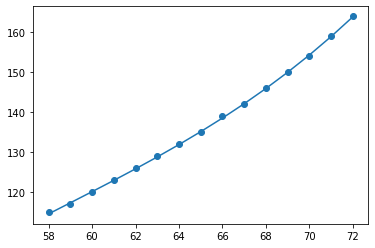

In [10]:
y_pred=polyreg.predict(X_poly) #the predicted points y from our model on X_poly, which is the transform of X.
plt.scatter(X,Y)
plt.plot(X,y_pred)
plt.show()

### 2. Polynomial regression with statsmodels

The process in `statsmodels` is similar, but requires the use of the `formula.api`. A benefit, however, is that we can print out a summary, including p-values:

In [11]:
import statsmodels.formula.api as smf
X=df["height"]
Y=df["weight"]
degree=3
weights = np.polyfit(X,Y, degree) 
model = np.poly1d(weights) 
results = smf.ols(formula='Y~ model(X)',data=df).fit()
results.summary()

C:\Users\Mattheus\anaconda3\envs\smm750\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.954e+04
Date:                Sun, 21 Nov 2021   Prob (F-statistic):           3.47e-25
Time:                        18:06:08   Log-Likelihood:                 1.3441
No. Observations:                  15   AIC:                             1.312
Df Residuals:                      13   BIC:                             2.728
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.245e-12      0.564   3.98e-12      1.000      -1.218       1.218
model(X)       1.0000      0.004    244.001      0.000       0.991       1.009
==============================================================================
Omnibus:                        0.028   Durbin-Watson:                   2.388
Prob(Omnibus):                  0.986   Jarque-Bera (JB):                0.127
Skew:                           0.049   Prob(JB):                        0.939
Kurtosis:                       2.561   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Again, we can plot our fitted model:

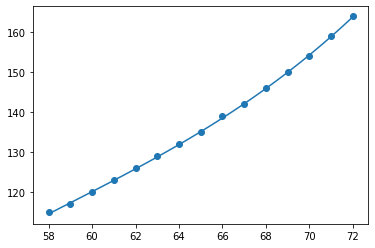

In [12]:
linepoints = np.linspace(min(X), max(X), 100)
plt.scatter(X,Y)
plt.plot(linepoints, model(linepoints))
plt.show()

# Part 3: Selling ice-creams

Make sure the .csv file containing M. Gelato's sales is in your current directory. Start by loading the document and looking at his header.

In [13]:
Gelato=pd.read_csv("Gelato_Times_Sales.csv")
Gelato.head()

,Times,Sales
0,1,122
1,29,215
2,60,228
3,88,225
4,121,190


## 1. Scatter plot: plot M. Gelato's sales as a function of time in a scatterplot

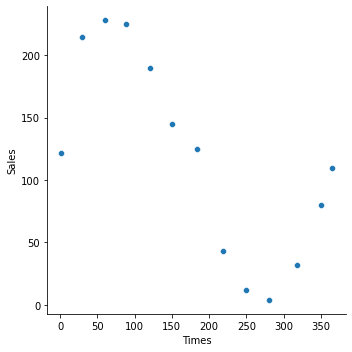

In [14]:
sns.relplot(x="Times",y="Sales",data=Gelato)
plt.show()

## 2. Polynomial regression: d=1
    1. Using the statsmodels code in Part 2 Question 2 above, fit a polynomial of degree d=1 to the data. 
    2. Obtain the summary of your regression. What is the value of R^2? Adjusted R^2?
    3. Using the code in Part 2 Question 2, plot the datapoints with the polynomial fit graphed on top.

## 3. **Polynomial regression: larger d**: 
    1. Repeat the steps above for increasing values of d (for example, for d=2, d=3, d=4, d=5). Write down the values of R^2 you obtain. What happens to R^2? What happens to your fit?
    2. What is the smallest degree for which the adjusted R^2 is equal to 1?
    3. Consider the polynomial you obtain in this case. Why is R^2 equal to 1 in your opinion?
    4. Do you think this fit is a good prediction of what will happen next year? What is the issue here? How would you propose to counterbalance it?

# Part 4: Evaluating a model

We now turn to systematically evaluating a model, based on predictive power. For this, we will split the dataset into training and testing. We then run the polynomial regression on the training set, and see how good it performs the data from the testing set (important: this is data that our model doesn't see when training!)

In [15]:
X=Gelato[["Times"]]
Y=Gelato[["Sales"]]

We split the data into training and testing. 25% for testing is quite common. We also fix the `random_state` to make our model reproducible (while it's good practice to be reproducible, you should always check that your results are not dependent on the random state)

In [16]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.25,random_state = 105)

We can start with choosing some degree, here 3, and running the polynomial regression (we use `sklearn` because making predictions is easier)

In [17]:
degree=3
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(trainX)
polyreg = LinearRegression()
polyreg.fit(X_poly, trainY) # try and find coefficients c1+c2*x+x3*x^2+... via linear regression

LinearRegression()

We now predict the sales on the testing set. For that, we also need to transform our `testX` to fit into the polynomial model.

In [18]:
testX_poly = poly.fit_transform(testX)
testY_pred = polyreg.predict(testX_poly)

We can plot the predictions to see how far they deviate from the actuals:

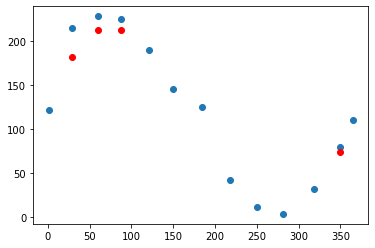

In [19]:
plt.scatter(X,Y)
plt.scatter(testX,testY_pred,color="red")
plt.show()

More systematically, we can measure the (root) mean difference between actual values in the testing set and predicted values (we take the square root at the end, to have orders of magnitude related to the sales quantities):

In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(testY,testY_pred)**(1/2)

19.448072673516734

# Part 5: Finding a good model

Using a validation set, we run through all the different degrees and find the smallest RMSE. We should then test the final model on a (completely different) testing set - we omit this here, as the size of the dataset is quite small, but we get back to that in class.

In [21]:
trainX, validateX, trainY, validateY = train_test_split(X, Y, test_size=0.25,random_state = 120)

In [22]:
rmse = []
for degree in range(1,12):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(trainX)
    polyreg = LinearRegression()
    polyreg.fit(X_poly, trainY)
    validateX_poly = poly.fit_transform(validateX)
    validateY_pred = polyreg.predict(validateX_poly)
    rmse.append(mean_squared_error(validateY,validateY_pred)**(1/2))

In [23]:
rmse

[43.149205521245506,
 44.600619193429125,
 12.566615263884474,
 20.419905011072352,
 21.510445486921913,
 17.091335301947158,
 32.08522080969684,
 31.502262473136618,
 41.51513589820082,
 51.97518620515622,
 44.28233989771745]

It seems that a degree of 3 would have led to the best RMSE. But keep in mind that we only have very limited data here. If we end up choosing this model, we should evaluate it on a testing set, still!